# Lista 2

### Maria Nowacka 275981

In [15]:
import sklearn, numpy as np, matplotlib.pyplot as plt, pandas as pd

### zadanie 1
Generowanie danych syntetycznych: Wygeneruj syntetyczny zbiór
danych z trzema wyraźnie oddzielonymi skupieniami, używając funkcji
`make_blobs` z biblioteki `scikit-learn`. Zwizualizuj dane za pomocą
wykresu punktowego.

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, random_state=17)
X, y

(array([[ -4.00284364,   0.91232615],
        [  5.79012276,   2.31435715],
        [ -6.79494125,  -9.69962549],
        [ -5.08899425,   1.6430042 ],
        [ -3.96256795, -12.04192362],
        [  5.9631969 ,   2.8971165 ],
        [ -4.86192298,   0.9616311 ],
        [  5.07786166,   2.54750191],
        [ -3.97997274,  -0.08244378],
        [ -1.38590436,   1.22274299],
        [ -5.19892985,   0.36170767],
        [ -6.1123045 ,  -9.68216441],
        [ -2.98751815,  -0.371661  ],
        [ -4.96119913,  -8.59071555],
        [ -5.26211324,   3.95689251],
        [  7.34466934,   4.2255323 ],
        [  4.36110732,   2.79868978],
        [ -5.59022323,  -7.7087426 ],
        [ -3.46877377,   1.31484579],
        [ -5.27207303,  -1.42425968],
        [ -5.66528623,  -9.31769543],
        [  6.27710584,   2.3028006 ],
        [ -5.31926018,   0.77172597],
        [ -5.11344619,  -8.63750109],
        [  5.95457562,   4.3690958 ],
        [ -4.71676999,   1.79713932],
        [  7

In [17]:
df = pd.DataFrame(X)

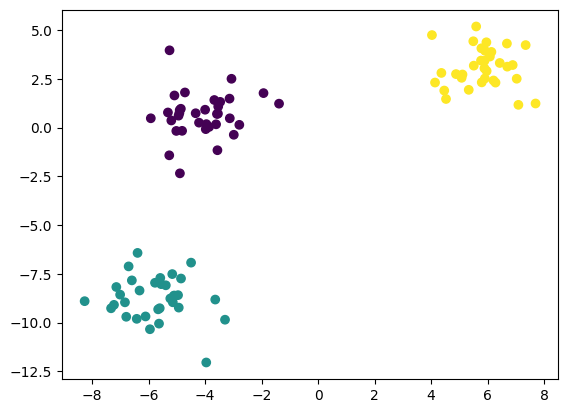

In [18]:
plt.scatter(df[0], df[1], c=y)

### zadanie 2
Implementacja algorytmu k-means: Zaimplementuj algorytm k-means od podstaw (bez użycia scikit-learn.cluster). Twoja implementacja powinna obejmować:
* Inicjalizację centroidów.
* Pętlę, w której punkty są przypisywane do najbliższego centroidu.
* Aktualizację położenia centroidów jako średniej z przypisanych punktów.

Przetestuj swój kod na danych z zadania 1.

In [19]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

def cosine_distance(x, y):
    cos_sim = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return 1 - cos_sim

In [20]:
class MarysiaKmeans:
    def __init__(self, k=3, max_iters=100, tol=1e-8):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    @staticmethod
    def euc_dist(x, y):
        return np.sqrt(np.sum((x - y)**2))
    
    def init_centroids(self, X):
        first = X[np.random.choice(X.shape[0])]
        centroids = []
        centroids.append(first)
        for _ in range(1, self.k):
            distances = np.array([
                min([MarysiaKmeans.euc_dist(x, c)**2 for c in centroids])
                for x in X
            ])
            probs = distances / distances.sum()
            next_idx = np.random.choice(X.shape[0], p=probs)
            centroids.append(X[next_idx])
        return np.array(centroids)

    def train(self, X):
        self.centroids = self.init_centroids(X)
        for i in range(self.max_iters):
            self.labels = np.array([
                np.argmin([MarysiaKmeans.euc_dist(x, c)
                    for c in self.centroids])
                    for x in X])
            new_centroids = self.centroids.copy()
            for s in range(self.k):
                new_centroids[s] = np.mean(X[self.labels == s], axis=0)
            distances = [MarysiaKmeans.euc_dist(new_centroids[i], self.centroids[i]) for i in range(self.k)]
            self.centroids = new_centroids
            if sum(distances) < self.k*self.tol:
                break

    def predict(self, X):
        return np.array([np.argmin([MarysiaKmeans.euc_dist(x, c)
                    for c in self.centroids])
                    for x in X])

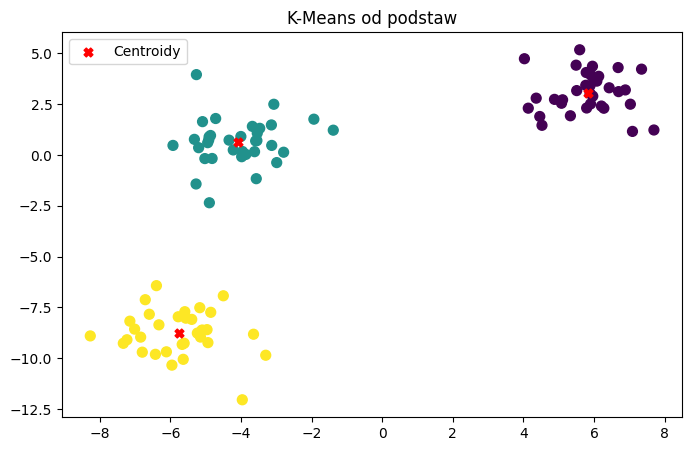

In [21]:
model = MarysiaKmeans(3)
model.train(X)
y_p = model.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_p, cmap='viridis', s=50)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1],
            c='red', marker='X', s=40, label='Centroidy')
plt.legend()
plt.title("K-Means od podstaw")
plt.show()

### zadanie 3
Zastosowanie algorytmu k-means z biblioteki `scikit-learn`:
Użyj klasy `KMeans` z biblioteki `scikit-learn` do pogrupowania danych z zadania 1. Porównaj wyniki z własną implementacją. Zwizualizuj otrzymane klastry, kolorując punkty według ich przynależności.

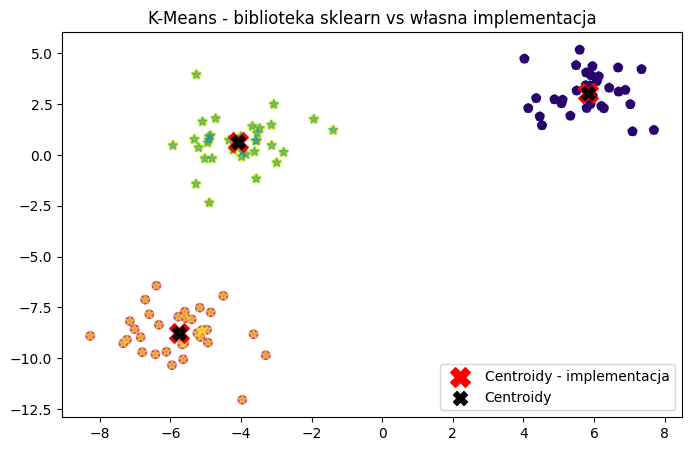

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y_p+3, s=50, alpha = 0.5, marker='*')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroidy - implementacja')
plt.scatter(model.centroids[:, 0], model.centroids[:, 1],
            c='black', marker='X', s=100, label='Centroidy')
plt.legend()
plt.title("K-Means - biblioteka sklearn vs własna implementacja")
plt.show()

### zadanie 4
Klastrowanie hierarchiczne: Zastosuj algorytm klastrowania hierarchicznego (`AgglomerativeClustering` z `scikit-learn`) na syntetycznym zbiorze danych z zadania 1. Użyj różnych miar odległości
(np. `linkage=’ward’`) i zwizualizuj wyniki za pomocą dendrogramu.
Omów, jak wybór miary odległości wpływa na strukturę skupień.


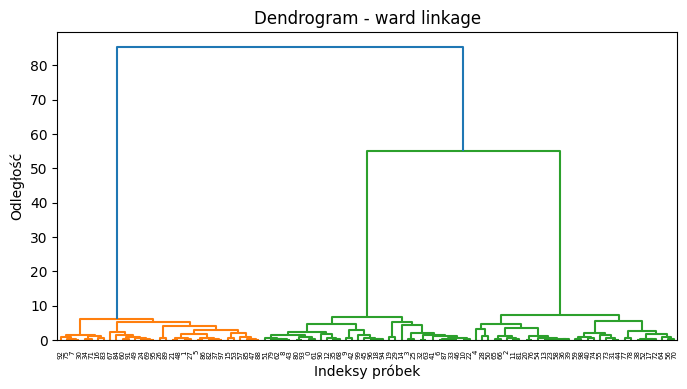

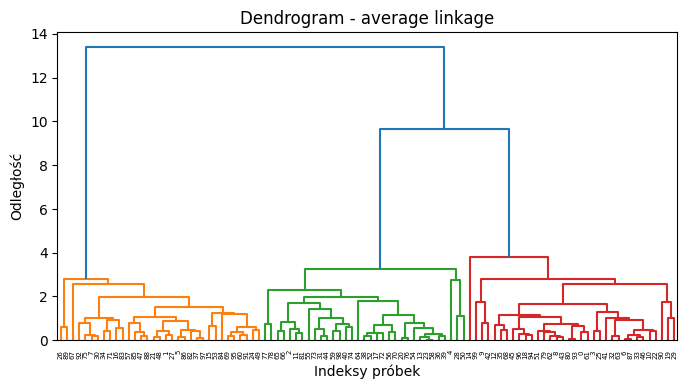

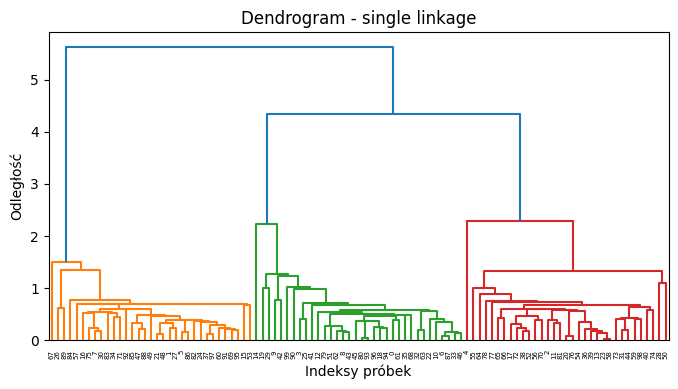

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ['ward', 'average', 'single']

for method in linkage_methods:
    plt.figure(figsize=(8, 4))

    Z = linkage(X, method=method)

    dendrogram(Z)
    plt.title(f"Dendrogram - {method} linkage")
    plt.xlabel("Indeksy próbek")
    plt.ylabel("Odległość")

    plt.show()


* ward – minimalizuje sumę kwadratów odległości.

* average – używa średniej odległości między wszystkimi punktami w klastrach.

* single – używa minimalnej odległości między punktami; może prowadzić do „łańcuchowego” efektu, gdzie klaster ciągnie się wzdłuż punktów.

### zadanie 5
Ocena jakości klastrowania: Zastosuj metodę łokcia (Elbow Method) oraz wskaźnik Silhouette, aby określić optymalną liczbę skupień dla zbioru danych `Iris`. Stwórz wykres dla obu metod i zinterpretuj wyniki.

In [24]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True).frame

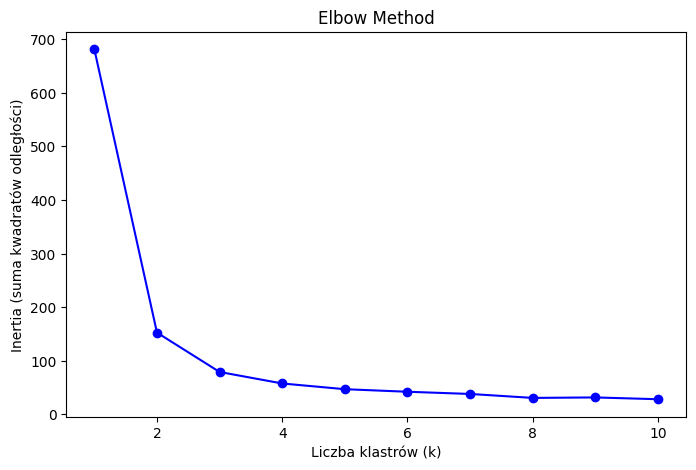

In [25]:
df_i = iris.drop(columns='target')

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_i)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inertia (suma kwadratów odległości)')
plt.title('Elbow Method')
plt.show()


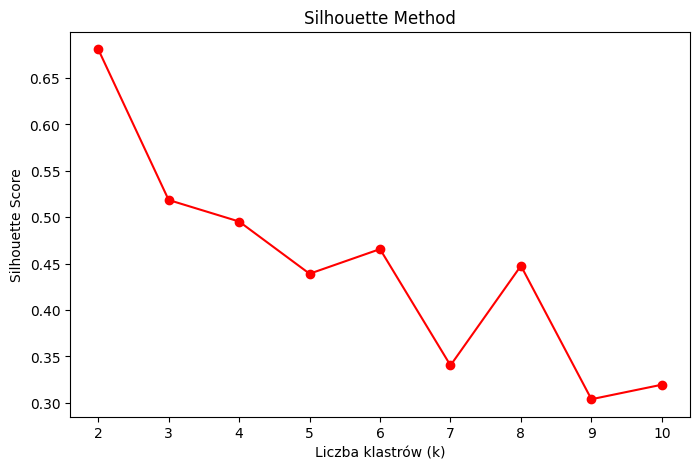

In [26]:
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df_i)
    score = silhouette_score(df_i, labels)
    sil_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K, sil_scores, 'ro-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


### zadanie 6
Zastosowanie algorytmu DBSCAN: Użyj klasy `DBSCAN` z biblioteki
`scikit-learn` do pogrupowania danych z zadania 1. Przetestuj różne
wartości parametrów `eps` i `min_samples` i zaobserwuj, jak wpływają
one na wyniki klastrowania. Zidentyfikuj ”szum” (punkty odstające).

eps – maksymalna odległość między punktami w tym samym klastrze \
min_samples – minimalna liczba punktów w klastrze

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
X, y = make_blobs(n_samples=100, centers=3, random_state=17)

eps=0.3, min_samples=3 -> klastry: 7, szum: 71


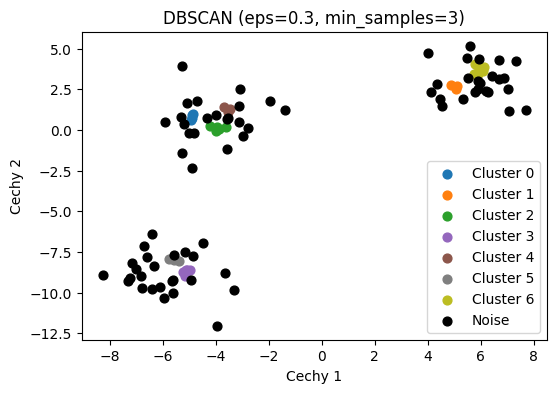

eps=0.3, min_samples=7 -> klastry: 0, szum: 100


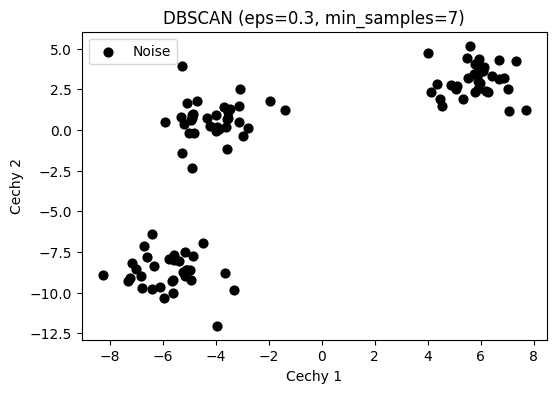

eps=0.6, min_samples=3 -> klastry: 6, szum: 28


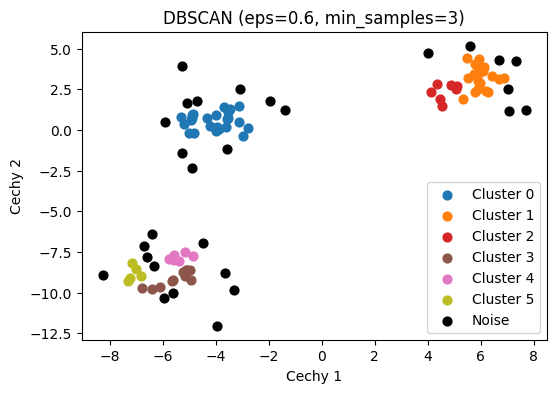

eps=0.6, min_samples=7 -> klastry: 5, szum: 61


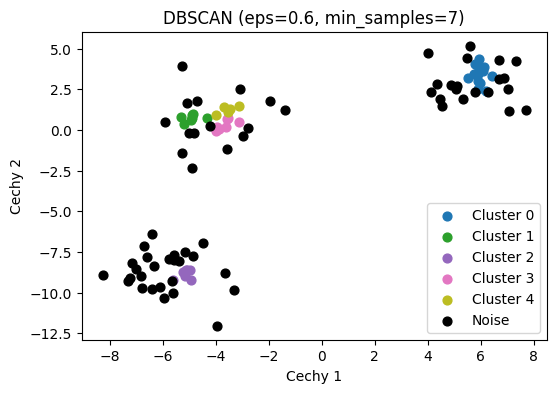

eps=0.9, min_samples=3 -> klastry: 3, szum: 14


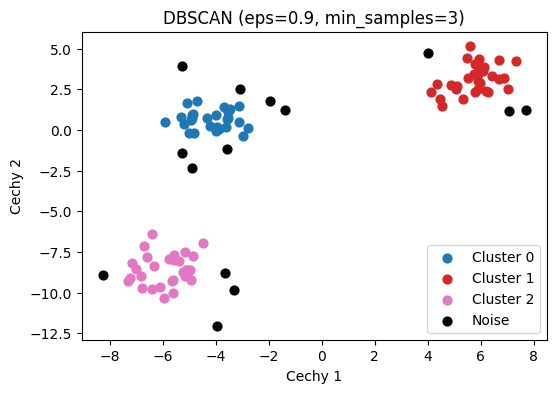

eps=0.9, min_samples=7 -> klastry: 3, szum: 19


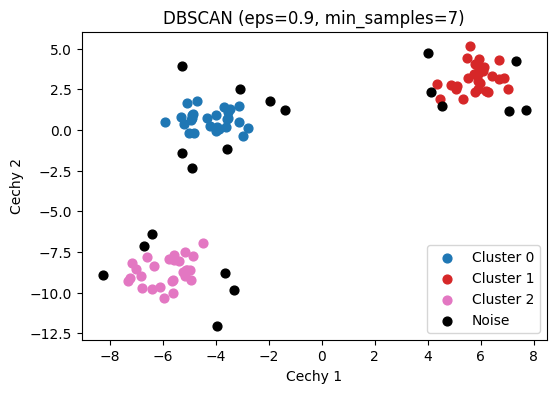

In [29]:
eps_values = [0.3, 0.6, 0.9]
min_samples_values = [3, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f"eps={eps}, min_samples={min_samples} -> klastry: {n_clusters}, szum: {n_noise}")

        plt.figure(figsize=(6,4))
        unique_labels = set(labels)
        colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]
            class_member_mask = (labels == k)
            plt.scatter(X[class_member_mask, 0], X[class_member_mask, 1],
                        c=[col], label=f'Cluster {k}' if k != -1 else 'Noise', s=40)

        plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
        plt.xlabel('Cechy 1')
        plt.ylabel('Cechy 2')
        plt.legend()
        plt.show()


### zadanie 7
Analiza danych rzeczywistych: Wczytaj zbiór danych dotyczący
klientów (np. `Mall Customer Segmentation Data` z Kaggle). Przeprowadź analizę skupień na podstawie wybranych cech (np. wiek i roczny
dochód). Zastosuj algorytm k-means i zwizualizuj otrzymane segmenty
klientów. Zinterpretuj wyniki.

### 3 cechy

In [30]:
df2=pd.read_csv("Mall_Customers.csv")
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [42]:
Q = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Text(0, 0.5, 'Annual Income (k$)')

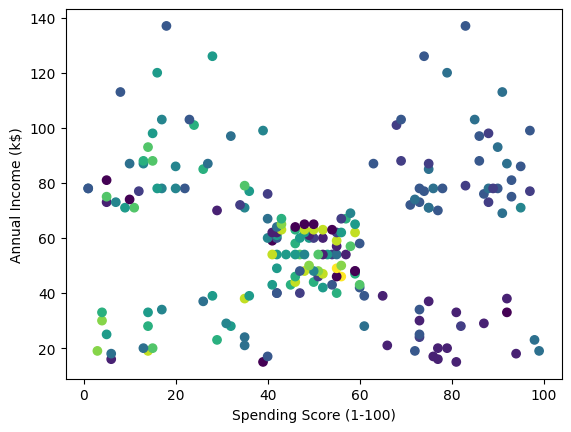

In [43]:
plt.scatter(Q['Spending Score (1-100)'], Q['Annual Income (k$)'], c=np.floor(Q['Age']/5), cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

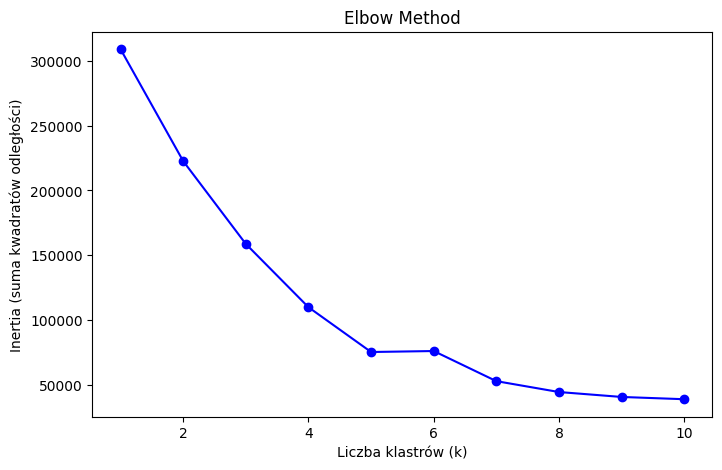

In [44]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Q)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inertia (suma kwadratów odległości)')
plt.title('Elbow Method')
plt.show()

In [34]:
k = 5

In [35]:
mall = MarysiaKmeans(k=5)
mall.train(Q.values)
pred = mall.predict(Q.values)

In [36]:
!pip install plotly

In [37]:
import plotly.graph_objects as go

scatter_points = go.Scatter3d(
    x=Q.iloc[:, 0],
    y=Q.iloc[:, 1],
    z=Q.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=pred,
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Punkty'
)

scatter_centroids = go.Scatter3d(
    x=mall.centroids[:, 0],
    y=mall.centroids[:, 1],
    z=mall.centroids[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        symbol='x'
    ),
    name='Centroidy'
)

fig = go.Figure(data=[scatter_points, scatter_centroids])

fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Income',
        zaxis_title='Spending Score'
    ),
    title='K-Means - 3D'
)

fig.show()


### 2 cechy

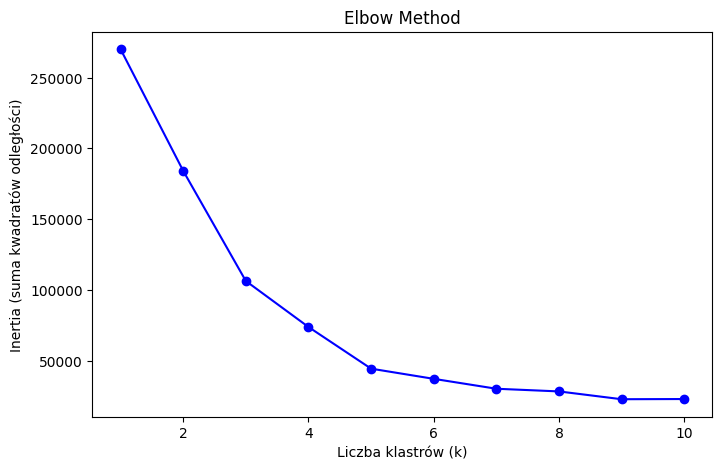

In [38]:
X2 = df2[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inertia (suma kwadratów odległości)')
plt.title('Elbow Method')
plt.show()

In [39]:
mall2 = MarysiaKmeans(k=5)
mall2.train(X2.values)
pred = mall2.predict(X2.values)

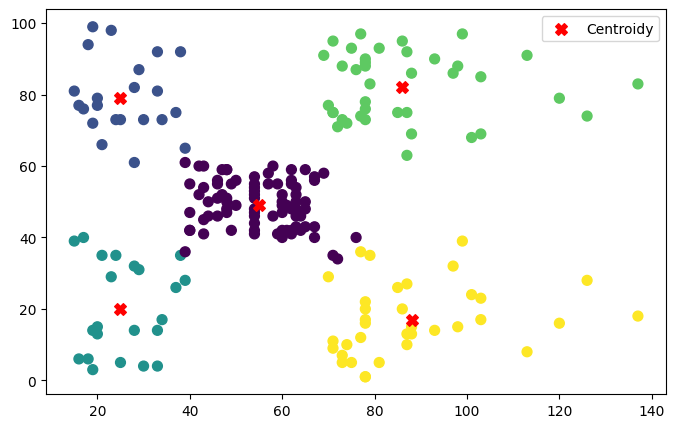

In [40]:
plt.figure(figsize=(8, 5))
plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=pred, cmap='viridis', s=50)
plt.scatter(mall2.centroids[:, 0], mall2.centroids[:, 1],
            c='red', marker='X', s=70, label='Centroidy')
plt.legend()

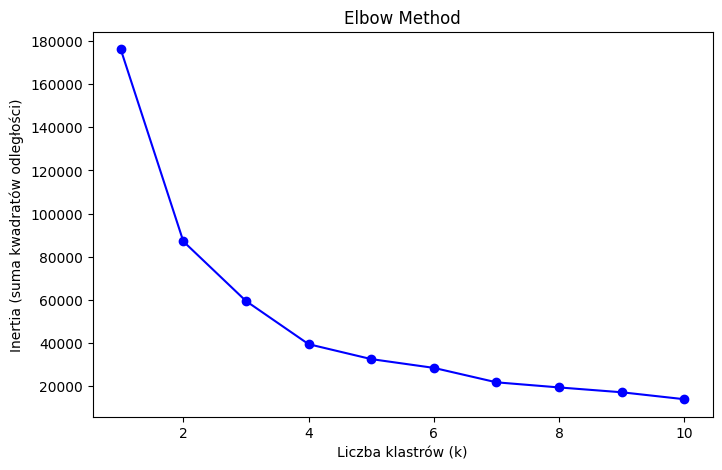

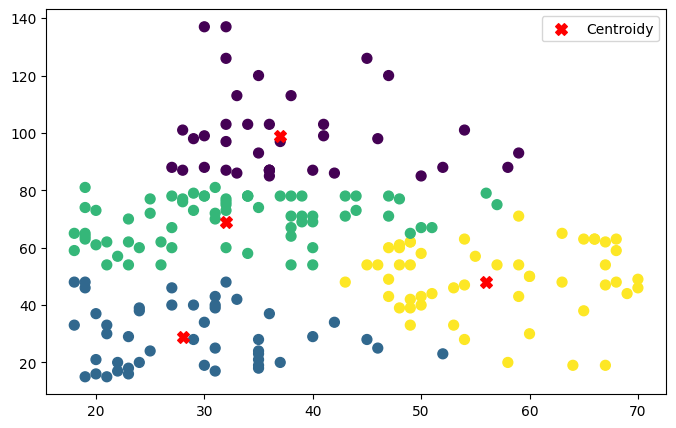

In [41]:
X3 = df2[['Age', 'Annual Income (k$)']]
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inertia (suma kwadratów odległości)')
plt.title('Elbow Method')
plt.show()
mall2 = MarysiaKmeans(k=4)
mall2.train(X3.values)
pred = mall2.predict(X3.values)
plt.figure(figsize=(8, 5))
plt.scatter(X3.iloc[:, 0], X3.iloc[:, 1], c=pred, cmap='viridis', s=50)
plt.scatter(mall2.centroids[:, 0], mall2.centroids[:, 1],
            c='red', marker='X', s=70, label='Centroidy')
plt.legend()